<a href="https://colab.research.google.com/github/Valerie-Perea/DDDS-Cohort-16-Projects/blob/main/Project_5_NLP_VP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



### Business Problem
    Supervised vs unsupervised?
    If there is no target then our problem is unsupervised. I can't find a target for this problem so I believe it is an unsupervised learning problem where we are trying to cluster similar people based on frequency of words in their WIKI API.

This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive


### Part 1)



- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is to ...
  1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense
  1. Also output the sentiment of the overview of the target person



### Part 2)



- For the same target person that you chose in Part 1), use the Wikipedia API to access the whole content of the target person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the target person
  1. Determine the sentiment of the text of the Wikipedia page for the target person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.



### Part 3)


Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


## Part 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [32]:
df = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv')

In [33]:
df.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [34]:
import pandas as pd
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Use the actual text column name (e.g., 'bio', 'profile', etc.)
text_column = 'text'
text_data = df[text_column].fillna("")

# Create bag-of-words vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Pick one person (you can also pick by index instead of random)
person_index = random.randint(0, len(df) - 1)
person_vector = X[person_index]

# Compute cosine similarity between this person and all others
similarities = cosine_similarity(person_vector, X).flatten()

# Exclude the person themself from the results
similarities[person_index] = -1  # Set self-similarity to -1 to exclude

# Get indices of top 10 similar people
top_match_indices = similarities.argsort()[::-1][:10]

# Show the chosen person and their top matches
print("Chosen person:\n", df.iloc[person_index])
print("\nTop 10 similar people:\n", df.iloc[top_match_indices])


Chosen person:
 URI           <http://dbpedia.org/resource/Yoriko_Madoka>
name                                        Yoriko Madoka
text    yoriko madoka madoka yoriko born february 10 1...
Name: 39343, dtype: object

Top 10 similar people:
                                                      URI                 name  \
1819        <http://dbpedia.org/resource/Maria_Damanaki>       Maria Damanaki   
31547          <http://dbpedia.org/resource/Helen_Clark>          Helen Clark   
38777         <http://dbpedia.org/resource/Ruth_Bennett>         Ruth Bennett   
14213     <http://dbpedia.org/resource/Lynda_Haverstock>     Lynda Haverstock   
38499      <http://dbpedia.org/resource/Ioanna_Kontouli>      Ioanna Kontouli   
32107    <http://dbpedia.org/resource/Monica_McWilliams>    Monica McWilliams   
475     <http://dbpedia.org/resource/Brenda_Chamberlain>   Brenda Chamberlain   
3109          <http://dbpedia.org/resource/Kay_Hallahan>         Kay Hallahan   
606           <http://dbpedia

In [35]:
from textblob import TextBlob

# Get the target person's overview text
target_text = df.iloc[person_index][text_column]

# Analyze sentiment
blob = TextBlob(target_text)
sentiment = blob.sentiment  # This gives a namedtuple (polarity, subjectivity)

# Output the sentiment
print(f"\nSentiment of target person's text:")
print(f"Polarity: {sentiment.polarity:.2f} (−1 = negative, +1 = positive)")
print(f"Subjectivity: {sentiment.subjectivity:.2f} (0 = objective, 1 = subjective)")


Sentiment of target person's text:
Polarity: 0.17 (−1 = negative, +1 = positive)
Subjectivity: 0.46 (0 = objective, 1 = subjective)


## Part 2

In [36]:
%%capture
!pip3 install wikipedia-api

In [37]:
import wikipediaapi

In [38]:
topic = df.iloc[person_index]['name']
wiki_wiki = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en')
page_py = wiki_wiki.page(topic)

In [39]:
wiki_text = page_py.text
wiki_text

'Yoriko Madoka (円 より子, Madoka Yoriko, born February 10, 1947) is a Japanese politician who served in the House of Councillors from 1993 to 2010.\n\nEarly life and career\nMadoka was born in Yokosuka, Kanagawa and grew up in Yao, Osaka and Takamatsu, Kagawa. She graduated from Tsuda College in 1969, and worked in the editorial department of the English-language newspaper The Japan Times and as a freelance journalist and author, particularly focusing on women and family issues. Her efforts also made her prominent as a television commentator.\n\nPolitical career\nMadoka ran unsuccessfully in the 1992 House of Councillors election as a proportional representation candidate from the Japan New Party (JNP). After three members resigned from the House to run in the 1993 general election, Madoka was elected to fill one of the vacated seats (that of Yuriko Koike).\nShe was chairman of the JNP Organizing Committee at its dissolution on December 9, 1994, when it merged with other parties to form t

In [40]:
# Analyze sentiment
blob = TextBlob(wiki_text)
sentiment = blob.sentiment

# Output the sentiment
print(f"\nSentiment of target person's text:")
print(f"Polarity: {sentiment.polarity:.2f} (−1 = negative, +1 = positive)")
print(f"Subjectivity: {sentiment.subjectivity:.2f} (0 = objective, 1 = subjective)")


Sentiment of target person's text:
Polarity: 0.09 (−1 = negative, +1 = positive)
Subjectivity: 0.39 (0 = objective, 1 = subjective)


In [41]:
import re

# Function to clean Wikipedia text
def clean_wikipedia_text(text):
    text = re.sub(r'\[\d+\]', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    return text

# Function to get sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Initialize the Wikipedia API object
wiki_wiki = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en')

# Get the target person's name and fetch their Wikipedia page
topic = df.iloc[person_index]['name']
page_py = wiki_wiki.page(topic)

# Check if the page exists
if not page_py.exists():
    print(f"Sorry, the Wikipedia page for {topic} doesn't exist.")
else:
    # Extract the content of the target person's Wikipedia page
    target_text = clean_wikipedia_text(page_py.text)

    # Get sentiment of the target person
    target_sentiment = get_sentiment(target_text)
    print(f"\nSentiment of the Wikipedia page for {topic}:")
    print(f"Polarity: {target_sentiment.polarity:.2f} (−1 = negative, +1 = positive)")
    print(f"Subjectivity: {target_sentiment.subjectivity:.2f} (0 = objective, 1 = subjective)\n")

# Get the top 10 similar people and analyze their sentiment
print("Top 10 similar people and their sentiment analysis:")

# Loop through the top 10 similar people (based on your cosine similarity)
for idx in top_match_indices:
    neighbor_name = df.iloc[idx]['name']
    page_py = wiki_wiki.page(neighbor_name)

    # Check if the Wikipedia page exists
    if not page_py.exists():
        print(f"\nSorry, the Wikipedia page for {neighbor_name} doesn't exist.")
    else:
        # Extract the content and clean it
        neighbor_text = clean_wikipedia_text(page_py.text)

        # Get sentiment for the neighbor
        neighbor_sentiment = get_sentiment(neighbor_text)

        # Output the sentiment for the neighbor
        print(f"\nPerson {neighbor_name} (Index: {idx}):")
        print(f"Similarity Score: {similarities[idx]:.4f}")
        print(f"Polarity: {neighbor_sentiment.polarity:.2f} (−1 = negative, +1 = positive)")
        print(f"Subjectivity: {neighbor_sentiment.subjectivity:.2f} (0 = objective, 1 = subjective)")




Sentiment of the Wikipedia page for Yoriko Madoka:
Polarity: 0.09 (−1 = negative, +1 = positive)
Subjectivity: 0.39 (0 = objective, 1 = subjective)

Top 10 similar people and their sentiment analysis:

Person Maria Damanaki (Index: 1819):
Similarity Score: 0.8435
Polarity: 0.08 (−1 = negative, +1 = positive)
Subjectivity: 0.22 (0 = objective, 1 = subjective)

Person Helen Clark (Index: 31547):
Similarity Score: 0.8376
Polarity: 0.09 (−1 = negative, +1 = positive)
Subjectivity: 0.38 (0 = objective, 1 = subjective)

Person Ruth Bennett (Index: 38777):
Similarity Score: 0.8366
Polarity: 0.15 (−1 = negative, +1 = positive)
Subjectivity: 0.31 (0 = objective, 1 = subjective)

Person Lynda Haverstock (Index: 14213):
Similarity Score: 0.8333
Polarity: 0.17 (−1 = negative, +1 = positive)
Subjectivity: 0.44 (0 = objective, 1 = subjective)

Person Ioanna Kontouli (Index: 38499):
Similarity Score: 0.8302
Polarity: -0.02 (−1 = negative, +1 = positive)
Subjectivity: 0.25 (0 = objective, 1 = subject

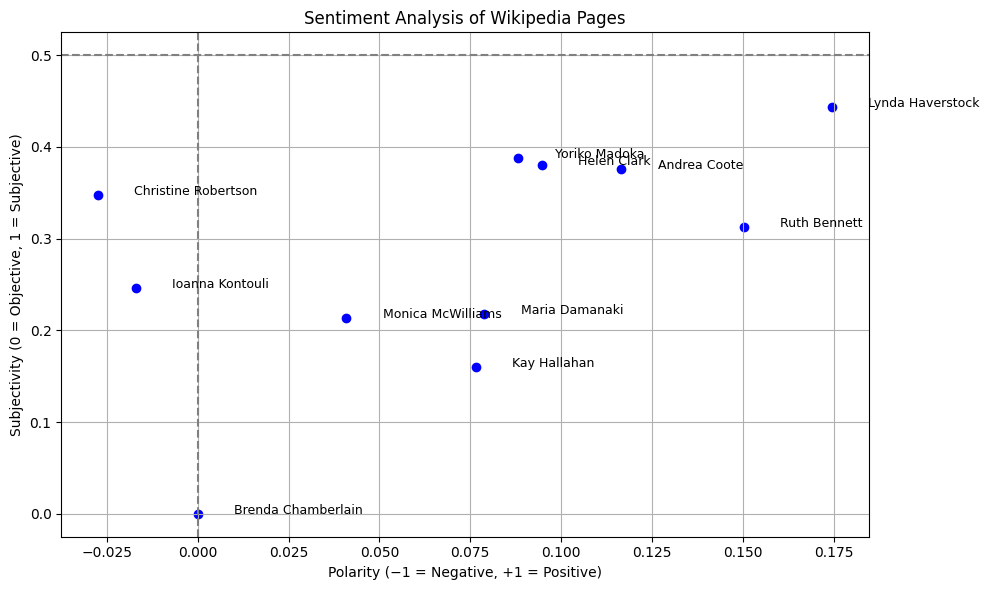

In [42]:
# Store names and sentiment scores
names = [topic]
polarities = [target_sentiment.polarity]
subjectivities = [target_sentiment.subjectivity]

# Collect data from the top 10 similar people
for idx in top_match_indices:
    neighbor_name = df.iloc[idx]['name']
    page_py = wiki_wiki.page(neighbor_name)

    if page_py.exists():
        neighbor_text = clean_wikipedia_text(page_py.text)
        neighbor_sentiment = get_sentiment(neighbor_text)
        names.append(neighbor_name)
        polarities.append(neighbor_sentiment.polarity)
        subjectivities.append(neighbor_sentiment.subjectivity)

# Create a scatter plot of polarity vs subjectivity
plt.figure(figsize=(10, 6))
plt.scatter(polarities, subjectivities, color='blue')

# Annotate points with names
for i, name in enumerate(names):
    plt.text(polarities[i] + 0.01, subjectivities[i], name, fontsize=9)

plt.title("Sentiment Analysis of Wikipedia Pages")
plt.xlabel("Polarity (−1 = Negative, +1 = Positive)")
plt.ylabel("Subjectivity (0 = Objective, 1 = Subjective)")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extract Wikipedia text for the target person
target_text = clean_wikipedia_text(page_py.text)

# Extract Wikipedia text for the top 10 similar people (neighbors)
neighbors_texts = []
for idx in top_match_indices:
    neighbor_name = df.iloc[idx]['name']
    page_py = wiki_wiki.page(neighbor_name)
    if page_py.exists():
        neighbors_texts.append(clean_wikipedia_text(page_py.text))
    else:
        neighbors_texts.append("")

# Combine target person's text with neighbors' text
all_texts = [target_text] + neighbors_texts

# Vectorize the texts using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_texts)

# Compute cosine similarities between the target and all neighbors
cosine_similarities_wikipedia = cosine_similarity(X[0:1], X[1:]).flatten()

# Print the cosine similarities with the Wikipedia content
print(f"Cosine similarities with Wikipedia content: {cosine_similarities_wikipedia}")


Cosine similarities with Wikipedia content: [0.85219399 0.87754273 0.72291024 0.84172191 0.87264246 0.82935067
 0.02877853 0.8643059  0.84919332 1.        ]


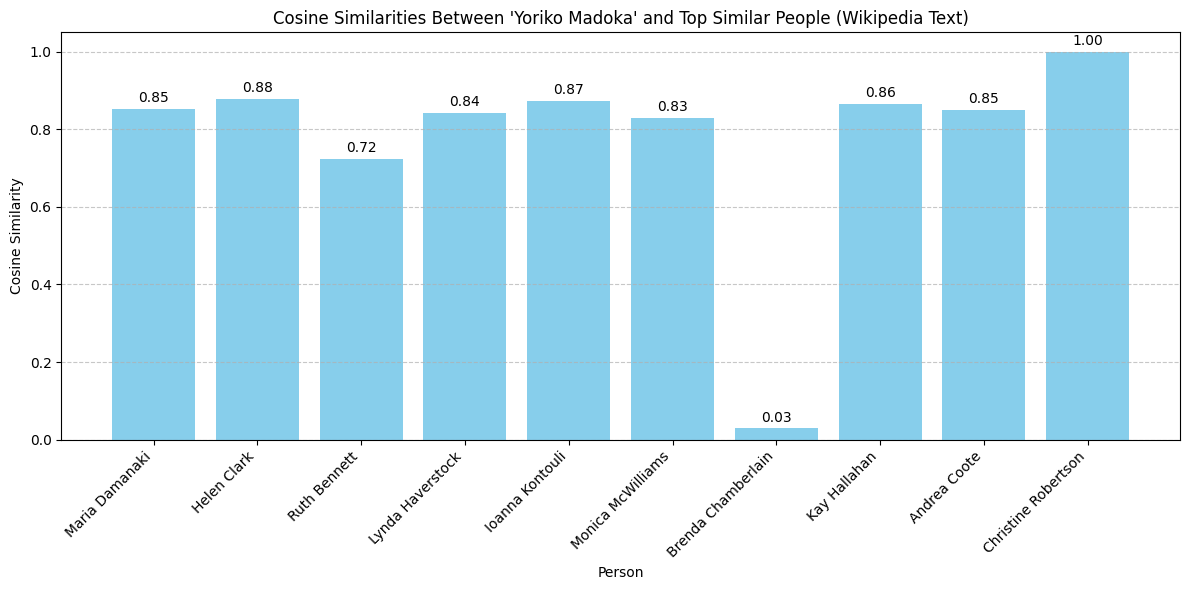

In [44]:
# Collect valid neighbor names and their cosine similarities
valid_neighbor_names = []
valid_similarities = []

for idx, similarity in zip(top_match_indices, cosine_similarities_wikipedia):
    neighbor_name = df.iloc[idx]['name']
    page_py = wiki_wiki.page(neighbor_name)
    if page_py.exists():
        valid_neighbor_names.append(neighbor_name)
        valid_similarities.append(similarity)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(valid_neighbor_names, valid_similarities, color='skyblue')

# Annotate each bar with similarity value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.title(f"Cosine Similarities Between '{topic}' and Top Similar People (Wikipedia Text)")
plt.xlabel("Person")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [45]:
import numpy as np

# Rank the similarities from Bag-of-Words (Step 1)
bag_of_words_ranking = np.argsort(similarities)[::-1]

# Rank the similarities from Wikipedia content
wikipedia_ranking = np.argsort(cosine_similarities_wikipedia)[::-1]

# Print rankings
print(f"Bag-of-Words Ranking (similarity): {bag_of_words_ranking}")
print(f"Wikipedia Content Ranking (similarity): {wikipedia_ranking}")


Bag-of-Words Ranking (similarity): [ 1819 31547 38777 ... 25962  2375 39343]
Wikipedia Content Ranking (similarity): [9 1 4 7 0 8 3 5 2 6]


In [46]:
def clean_wikipedia_text(text):
    text = re.sub(r'\[\d+\]', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    return text

wiki_wiki = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en')

# Get the target person's Wikipedia page
target_name = df.iloc[person_index]['name']
target_page = wiki_wiki.page(target_name)
target_text = clean_wikipedia_text(target_page.text if target_page.exists() else "")

# Get neighbor pages
neighbor_texts = []
valid_indices = []

for idx in top_match_indices:
    name = df.iloc[idx]['name']
    page = wiki_wiki.page(name)
    if page.exists():
        neighbor_texts.append(clean_wikipedia_text(page.text))
        valid_indices.append(idx)
    else:
        neighbor_texts.append("")
        valid_indices.append(idx)  # Keep index even if empty, or skip if preferred

# Vectorize Wikipedia texts
wiki_vectorizer = CountVectorizer()
wiki_X = wiki_vectorizer.fit_transform([target_text] + neighbor_texts)

# Compute cosine similarity of Wikipedia pages
wiki_similarities = cosine_similarity(wiki_X[0:1], wiki_X[1:]).flatten()

In [47]:
# Create a DataFrame with both rankings
comparison_data = []

# Internal ranking names
internal_ranked_names = df.iloc[top_match_indices]['name'].values

# Wikipedia-based similarities already calculated for valid indices
wiki_ranked_indices = [x for _, x in sorted(zip(wiki_similarities, valid_indices), reverse=True)]
wiki_ranked_names = df.iloc[wiki_ranked_indices]['name'].values

# Build comparison rows
for i, name in enumerate(internal_ranked_names):
    internal_rank = i + 1
    if name in wiki_ranked_names:
        wiki_rank = list(wiki_ranked_names).index(name) + 1
    else:
        wiki_rank = None
    comparison_data.append({'Name': name, 'Internal Rank': internal_rank, 'Wikipedia Rank': wiki_rank})

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


                  Name  Internal Rank  Wikipedia Rank
0       Maria Damanaki              1               2
1          Helen Clark              2               1
2         Ruth Bennett              3               9
3     Lynda Haverstock              4               7
4      Ioanna Kontouli              5               3
5    Monica McWilliams              6               8
6   Brenda Chamberlain              7              10
7         Kay Hallahan              8               5
8         Andrea Coote              9               6
9  Christine Robertson             10               4


In [48]:
# Create the comparison table, sorted by Internal Rank
comparison_df_sorted = comparison_df.sort_values('Internal Rank').reset_index(drop=True)

# Display as a nice table
from IPython.display import display

print(f"\nSimilarity Ranking Comparison for '{target_name}':")
display(comparison_df_sorted[['Name', 'Internal Rank', 'Wikipedia Rank']])



Similarity Ranking Comparison for 'Yoriko Madoka':


,Name,Internal Rank,Wikipedia Rank
0,Maria Damanaki,1,2
1,Helen Clark,2,1
2,Ruth Bennett,3,9
3,Lynda Haverstock,4,7
4,Ioanna Kontouli,5,3
5,Monica McWilliams,6,8
6,Brenda Chamberlain,7,10
7,Kay Hallahan,8,5
8,Andrea Coote,9,6
9,Christine Robertson,10,4


In [49]:
# Ensure 'Rank Difference' is calculated first
comparison_df_sorted['Rank Difference'] = (
    comparison_df_sorted['Internal Rank'] - comparison_df_sorted['Wikipedia Rank']
).abs()


In [50]:
styled_table = comparison_df_sorted[['Name', 'Internal Rank', 'Wikipedia Rank', 'Rank Difference']].style\
    .background_gradient(subset=['Rank Difference'], cmap='Reds')\
    .bar(subset=['Internal Rank', 'Wikipedia Rank'], color='#5fba7d')\
    .set_caption(f"Similarity Ranking Comparison for '{target_name}'")\
    .set_table_styles([
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
    ])\
    .hide(axis='index')

styled_table


Name,Internal Rank,Wikipedia Rank,Rank Difference
Maria Damanaki,1,2,1
Helen Clark,2,1,1
Ruth Bennett,3,9,6
Lynda Haverstock,4,7,3
Ioanna Kontouli,5,3,2
Monica McWilliams,6,8,2
Brenda Chamberlain,7,10,3
Kay Hallahan,8,5,3
Andrea Coote,9,6,3
Christine Robertson,10,4,6


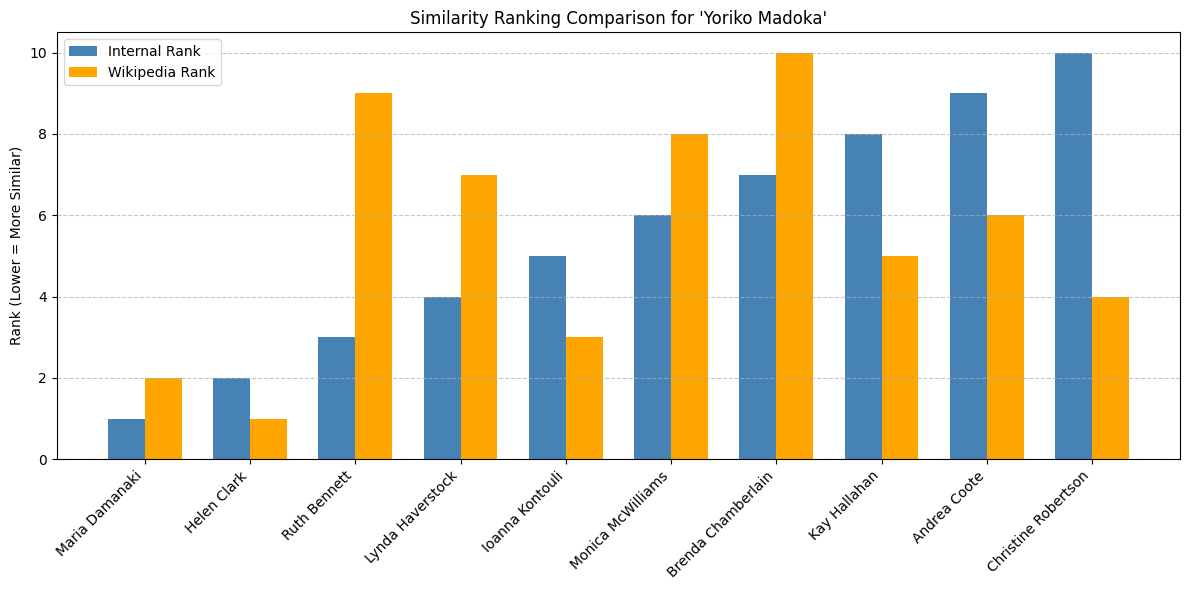

In [51]:
# Drop rows with missing Wikipedia ranks
plot_df = comparison_df.dropna().reset_index(drop=True)

# Prepare bar positions
x = np.arange(len(plot_df))  # number of people
width = 0.35  # width of the bars

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, plot_df['Internal Rank'], width, label='Internal Rank', color='steelblue')
plt.bar(x + width/2, plot_df['Wikipedia Rank'], width, label='Wikipedia Rank', color='orange')

# Add labels and title
plt.xticks(x, plot_df['Name'], rotation=45, ha='right')
plt.ylabel('Rank (Lower = More Similar)')
plt.title(f"Similarity Ranking Comparison for '{target_name}'")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [52]:
# Rank: higher similarity = higher rank (closer)
bow_ranking = np.argsort(similarities[valid_indices])[::-1]
wiki_ranking = np.argsort(wiki_similarities)[::-1]

# Compute rank differences
rank_differences = np.abs(bow_ranking - wiki_ranking)

In [53]:
# Step 1: Get similarities for the 10 neighbors from the Bag-of-Words full similarity list
bow_scores_for_neighbors = similarities[top_match_indices]

# Step 2: Get ranks (0 = most similar) based on scores
bow_rank_order = np.argsort(bow_scores_for_neighbors)[::-1]
wiki_rank_order = np.argsort(wiki_similarities)[::-1]

# Step 3: Create arrays that represent rank position of each neighbor
# Index is original neighbor index (0–9), value is their rank
bow_ranks = np.empty_like(bow_rank_order)
bow_ranks[bow_rank_order] = np.arange(10)

wiki_ranks = np.empty_like(wiki_rank_order)
wiki_ranks[wiki_rank_order] = np.arange(10)

# Step 4: Now compare the rankings directly
rank_differences = np.abs(bow_ranks - wiki_ranks)


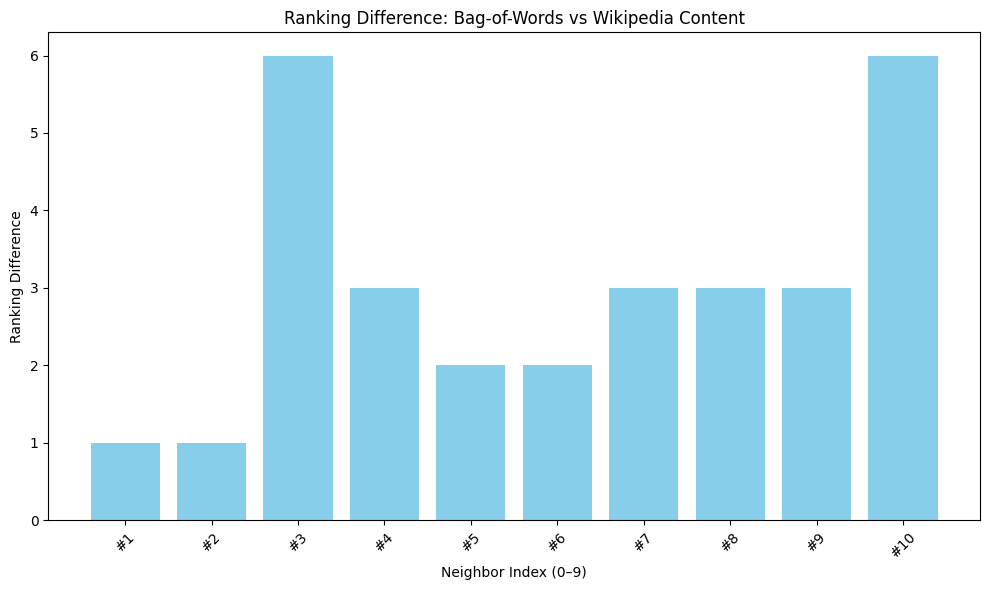

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), rank_differences, color='skyblue')
plt.xlabel('Neighbor Index (0–9)')
plt.ylabel('Ranking Difference')
plt.title('Ranking Difference: Bag-of-Words vs Wikipedia Content')
plt.xticks(range(10), [f'#{i+1}' for i in range(10)], rotation=45)
plt.tight_layout()
plt.show()

## Part 3

In [55]:
!pip install ipywidgets

In [56]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [57]:
print(df.columns)

Index(['URI', 'name', 'text'], dtype='object')


In [58]:
df = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv')

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, clear_output

# Precompute BoW matrix and similarity
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'].fillna(""))

# Create dropdown or text input for person selection
name_input = widgets.Combobox(
    placeholder='Type a name',
    options=df['name'].tolist(),
    description='Person:',
    ensure_option=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output_area = widgets.Output()

def show_similar_people(change):
    with output_area:
        clear_output()
        name = name_input.value
        if name not in df['name'].values:
            print(f"'{name}' not found in dataset.")
            return

        person_index = df[df['name'] == name].index[0]
        person_vector = X[person_index]

        # Compute similarity only for this person
        similarities = cosine_similarity(person_vector, X).flatten()
        top_indices = np.argsort(similarities)[::-1][1:11]

        print(f"\nTop 10 matches for: {name}\n")
        for i, idx in enumerate(top_indices):
            match_name = df.iloc[idx]['name']
            score = similarities[idx]
            print(f"{i+1}. {match_name} — Similarity: {score:.3f}")


# Trigger when value is submitted
name_input.observe(show_similar_people, names='value')

# Display the input and output
display(name_input, output_area)


Combobox(value='', description='Person:', ensure_option=True, layout=Layout(width='50%'), options=('Digby Morr…

Output()

In [60]:
print(f"Total entries: {len(df)}")
print(df.head())


Total entries: 42786
                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   

                                                text  
0  digby morrell born 10 october 1979 is a former...  
1  alfred j lewy aka sandy lewy graduated from un...  
2  harpdog brown is a singer and harmonica player...  
3  franz rottensteiner born in waidmannsfeld lowe...  
4  henry krvits born 30 december 1974 in tallinn ...  
